<a href="https://colab.research.google.com/github/DianaMCV/Redes/blob/main/RedComercio_2019_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Programas

In [139]:
!echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-cairo python3-matplotlib

Executing: /tmp/apt-key-gpghome.mbPK3f5x7n/gpg.1.sh --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: "Tiago de Paula Peixoto <tiago@skewed.de>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 http://downloads.skewed.de/apt bionic InRelease
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/li

In [140]:
! echo deb http://downloads.skewed.de/apt/DISTRIBUTION DISTRIBUTION universe>>/etc/apt/sources.list
! echo deb-src http://downloads.skewed.de/apt/DISTRIBUTION DISTRIBUTION universe>>/etc/apt/sources.list
! cat /etc/apt/sources.list

# See http://help.ubuntu.com/community/UpgradeNotes for how to upgrade to
# newer versions of the distribution.
deb http://archive.ubuntu.com/ubuntu/ bionic main restricted
# deb-src http://archive.ubuntu.com/ubuntu/ bionic main restricted

## Major bug fix updates produced after the final release of the
## distribution.
deb http://archive.ubuntu.com/ubuntu/ bionic-updates main restricted
# deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates main restricted

## N.B. software from this repository is ENTIRELY UNSUPPORTED by the Ubuntu
## team. Also, please note that software in universe WILL NOT receive any
## review or updates from the Ubuntu security team.
deb http://archive.ubuntu.com/ubuntu/ bionic universe
# deb-src http://archive.ubuntu.com/ubuntu/ bionic universe
deb http://archive.ubuntu.com/ubuntu/ bionic-updates universe
# deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates universe

## N.B. software from this repository is ENTIRELY UNSUPPORTED by the Ubuntu
## team, 

In [141]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 85 not upgraded.
W: Target Packages (main/binary-amd64/Packages) is configured multiple times in /etc/apt/sources.list:51 and /etc/apt/sources.list:54
W: Target Packages (main/binary-all/Packages) is configured multiple times in /etc/apt/sources.list:51 and /etc/apt/sources.list:54
W: Target Sources (universe/source/Sources) is configured multiple times in /etc/apt/sources.list:53 and /etc/apt/sources.list:56
W: Target Packages (universe/binary-amd64/Packages) is configured multiple times in /etc/apt/sources.list:52 and /etc/apt/sources.list:55

##Paquetería

In [144]:
#Pquetería
import pandas as pd
import re
import networkx as nx
import graph_tool.all as gt
import numpy as np
import geopandas as gpd  
import matplotlib.pyplot as plt  
import operator
import random

In [145]:
#Bases de datos
url='https://raw.githubusercontent.com/DianaMCV/Redes/main/comercio_2019.csv'
url1='https://raw.githubusercontent.com/DianaMCV/Redes/main/comercio_2020.csv'
url2='https://raw.githubusercontent.com/DianaMCV/Redes/main/comercio_2021.csv'
url3='https://raw.githubusercontent.com/RBESPINOSA/proyecto_redes/main/distancias_final.csv'
c2019 = pd.read_csv(url, index_col=0, encoding='latin-1') 
c2020 = pd.read_csv(url1, index_col=0, encoding='latin-1') 
c2021 = pd.read_csv(url2, index_col=0, encoding='latin-1') 
dist= pd.read_csv(url3, index_col=0, encoding='latin-1') 

#ANÁLISIS DE LA RED DE COMERCIALIZACIÓN DE FRUTAS Y HORTALIZAS, 2019

In [146]:
#DATAFRAME COMERCIO 2019
c2019.columns = c2019.columns.str.lower()
#Quedarse solo con los estados en la columna destino
c2019['destino']=c2019['destino'].apply(lambda x:(re.search('(.+(?=:))', x)).group(1))
#Agrupando
adj_2019 = c2019.groupby(['origen', 'destino']).size().rename('frecuencia').reset_index()
#Eliminamos self-loops
adj_2019=adj_2019[adj_2019['origen']!=adj_2019['destino']]
adj_2019.head()

,origen,destino,frecuencia
1,Aguascalientes,Chihuahua,6
2,Aguascalientes,Durango,24
3,Aguascalientes,Michoacán,12
4,Aguascalientes,Nayarit,18
5,Aguascalientes,Tamaulipas,6


In [147]:
#RED 2019

G19 = nx.from_pandas_edgelist(
    adj_2019,
    source='origen',
    target='destino',
    edge_attr='frecuencia',
    create_using=nx.DiGraph)

In [148]:
print("número de aristas", G19.size())
print("número de nodos", G19.order())

número de aristas 355
número de nodos 33


In [149]:
#in-degree
id=dict(G19.in_degree())
id=pd.DataFrame([[key, id[key]] for key in id.keys()], columns=['estado', 'in-degree'])
id.sort_values(by='in-degree', ascending=False)

,estado,in-degree
2,Durango,22
11,Nuevo León,21
9,Coahuila,20
0,Aguascalientes,17
7,Baja California,17
25,Querétaro,17
17,Distrito Federal,17
13,México,17
20,Morelos,16
22,Puebla,16


In [150]:
#out-degree
od=dict(G19.out_degree())
od=pd.DataFrame([[key, od[key]] for key in od.keys()], columns=['estado', 'out-degree'])
od.sort_values(by='out-degree', ascending=False)

,estado,out-degree
24,Veracruz,24
30,Importación,23
3,Michoacán,21
22,Puebla,21
6,Zacatecas,20
31,Sinaloa,19
16,Chiapas,17
14,Tabasco,17
27,Colima,16
1,Chihuahua,14


In [151]:
#betweenness centrality
bc=dict(nx.betweenness_centrality(G19))
bc=pd.DataFrame([[key, bc[key]] for key in bc.keys()], columns=['estado', 'betweenness centrality'])
bc.sort_values(by='betweenness centrality', ascending=False)

,estado,betweenness centrality
24,Veracruz,0.090648
10,Jalisco,0.086069
9,Coahuila,0.073446
22,Puebla,0.062055
17,Distrito Federal,0.061496
13,México,0.039328
6,Zacatecas,0.038901
14,Tabasco,0.038299
3,Michoacán,0.037431
23,Sonora,0.030774


In [152]:
#average clustering:
#ac=nx.average_clustering(G19)
#print("average clustering=", ac)
#Reciprocidad
#rec=nx.overall_reciprocity(G19)
#print("Reciprocidad=", rec)
#Densidad
#d=nx.density(G19)
#print("densidad=", d)
#Conectividad promedio
#cp=nx.average_node_connectivity(G19)
#print("conectividad promedio=", cp)

In [153]:
#OTRAS MEDIDAS
#nx.average_degree_connectivity(G19)
#nx.closeness_centrality(G19)
#nx.bridges no esta disponible para redes dirigidas
#nx.center no funciona porque no hay fuerte conectividad
#usarla usando los costos de transporte: nx.bellman_ford_path(G19,'Yucatán', 'Baja California', weight='frecuencia')

**MAPAS: LOS NODOS MÁS IMPORTANTES EN 2019**

**In degree centrality**

In [154]:
idc=nx.in_degree_centrality(G19)
A=(idc['Aguascalientes'], idc['Colima'], 0, idc['Distrito Federal'] , idc['Morelos'], idc['México'], idc['Hidalgo'], idc['Puebla'], idc['Nuevo León'], idc['Coahuila'], idc['Chihuahua'], idc['Sonora'], idc['Michoacán'], idc['Querétaro'], idc['Guanajuato'], idc['Jalisco'], idc['Zacatecas'], idc['Durango'], idc['Tamaulipas'], idc['Veracruz'], idc['Guerrero'], idc['Sinaloa'], idc['Oaxaca'], idc['Nayarit'], idc['Chiapas'], idc['Tabasco'], idc['Campeche'], idc['Baja California'], idc['Baja California Sur'], idc['San Luis Potosí'], idc['Yucatán'], idc['Quintana Roo'])
B=np.array(A)
B

array([0.53125, 0.03125, 0.     , 0.53125, 0.5    , 0.53125, 0.40625,
       0.5    , 0.65625, 0.625  , 0.4375 , 0.4375 , 0.4375 , 0.53125,
       0.375  , 0.46875, 0.3125 , 0.6875 , 0.1875 , 0.4375 , 0.1875 ,
       0.03125, 0.25   , 0.15625, 0.125  , 0.21875, 0.125  , 0.53125,
       0.15625, 0.375  , 0.1875 , 0.125  ])

fatal: destination path 'mexican-states' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  app.launch_new_instance()


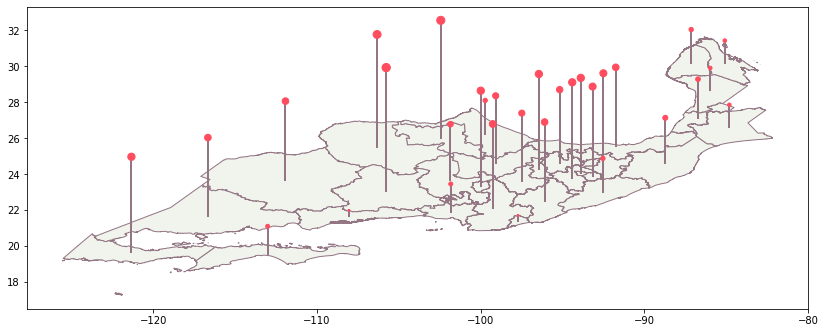

In [155]:
!git clone https://github.com/jschleuss/mexican-states.git

mex=gpd.read_file("mexican-states/mexican-states.shp")
df_dummy = pd.DataFrame({'Estados':mex.name.values,
                         'índice':B*10})
#Asignando centroides
x0=-102.57634952
y0=23.9353719
mex_tr = (mex["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))
x=(mex_tr
   .centroid
   .apply(lambda p:p.x)
   .values)
y=(mex_tr
   .centroid
   .apply(lambda p:p.y)
   .values)
fig,ax = plt.subplots(1,1,figsize=(14,10))
#Graficando el mapa
mex_tr.plot(ax=ax,
            color="#F0F4ED",
            edgecolor="#937584",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+df_dummy['índice'].values,
           color="#ff4d5f",
           zorder=2,
           s=10*df_dummy['índice'].values)
for i in range(32):
   ax.plot([x,x],
           [y,y+df_dummy['índice'].values],
           color="#937584",
           zorder=1)
plt.show()

In [156]:
adj_2019[adj_2019['destino']=='Durango']

,origen,destino,frecuencia
2,Aguascalientes,Durango,24
10,Baja California,Durango,6
24,Chiapas,Durango,52
41,Chihuahua,Durango,63
54,Coahuila,Durango,7
69,Colima,Durango,42
99,Guanajuato,Durango,42
113,Guerrero,Durango,13
135,Importación,Durango,122
158,Jalisco,Durango,143


In [157]:
adj_2019[adj_2019['origen']=='Durango']

,origen,destino,frecuencia
94,Durango,Coahuila,30


Durango es el que tiene mayor in-degree, curiosamente todo su comercio sólo se dirige a Coahuila.

**Out degree centrality**

In [158]:
odc=nx.out_degree_centrality(G19)
A=(odc['Aguascalientes'], odc['Colima'], 0, odc['Distrito Federal'] , odc['Morelos'], odc['México'], odc['Hidalgo'], odc['Puebla'], odc['Nuevo León'], odc['Coahuila'], odc['Chihuahua'], odc['Sonora'], odc['Michoacán'], odc['Querétaro'], odc['Guanajuato'], odc['Jalisco'], odc['Zacatecas'], odc['Durango'], odc['Tamaulipas'], odc['Veracruz'], odc['Guerrero'], odc['Sinaloa'], odc['Oaxaca'], odc['Nayarit'], odc['Chiapas'], odc['Tabasco'], odc['Campeche'], odc['Baja California'], odc['Baja California Sur'], odc['San Luis Potosí'], odc['Yucatán'], odc['Quintana Roo'])
B=np.array(A)
B

array([0.1875 , 0.5    , 0.     , 0.40625, 0.28125, 0.375  , 0.15625,
       0.65625, 0.15625, 0.375  , 0.4375 , 0.4375 , 0.65625, 0.0625 ,
       0.375  , 0.4375 , 0.625  , 0.03125, 0.21875, 0.75   , 0.4375 ,
       0.59375, 0.375  , 0.34375, 0.53125, 0.53125, 0.09375, 0.15625,
       0.     , 0.09375, 0.03125, 0.     ])

fatal: destination path 'mexican-states' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



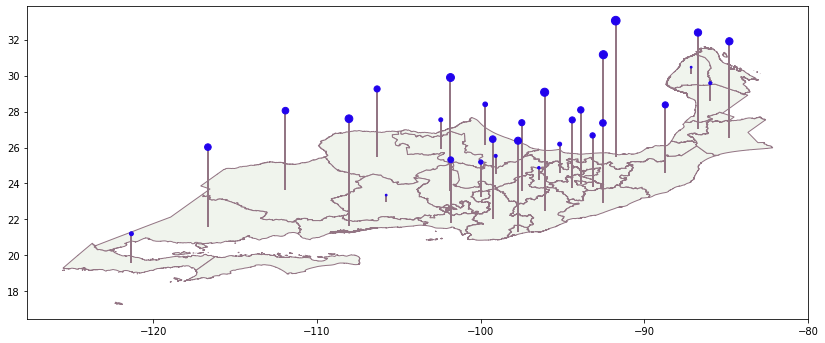

In [159]:
!git clone https://github.com/jschleuss/mexican-states.git

mex=gpd.read_file("mexican-states/mexican-states.shp")
df_dummy = pd.DataFrame({'Estados':mex.name.values,
                         'índice':B*10})
#Asignando centroides
x0=-102.57634952
y0=23.9353719
mex_tr = (mex["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))

x=(mex_tr
   .centroid
   .apply(lambda p:p.x)
   .values)
y=(mex_tr
   .centroid
   .apply(lambda p:p.y)
   .values)

fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
mex_tr.plot(ax=ax,
            color="#F0F4ED",
            edgecolor="#937584",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+df_dummy['índice'].values,
           color="#2102ED",
           zorder=2,
           s=10*df_dummy['índice'].values)
for i in range(32):
   ax.plot([x,x],
           [y,y+df_dummy['índice'].values],
           color="#937584",
           zorder=1)
plt.show()

In [160]:
adj_2019[adj_2019['destino']=='Veracruz']

,origen,destino,frecuencia
34,Chiapas,Veracruz,12
50,Chihuahua,Veracruz,18
62,Coahuila,Veracruz,6
78,Colima,Veracruz,12
92,Distrito Federal,Veracruz,72
123,Guerrero,Veracruz,24
151,Importación,Veracruz,24
188,Michoacán,Veracruz,12
266,Puebla,Veracruz,576
270,Querétaro,Veracruz,6


Veracruz tiene el mayor out-degree. Uno de sus fuentes más importantes son las importaciones. Sin embargo, Chihuhua, un estado del norte, envía directamente mercancías a Veracruz.



**Betweenness Centrality**

In [161]:
bc=nx.betweenness_centrality(G19)
A=(bc['Aguascalientes'], bc['Colima'], 0, bc['Distrito Federal'] , bc['Morelos'], bc['México'], bc['Hidalgo'], bc['Puebla'], bc['Nuevo León'], bc['Coahuila'], bc['Chihuahua'], bc['Sonora'], bc['Michoacán'], bc['Querétaro'], bc['Guanajuato'], bc['Jalisco'], bc['Zacatecas'], bc['Durango'], bc['Tamaulipas'], bc['Veracruz'], bc['Guerrero'], bc['Sinaloa'], bc['Oaxaca'], bc['Nayarit'], bc['Chiapas'], bc['Tabasco'], bc['Campeche'], bc['Baja California'], bc['Baja California Sur'], bc['San Luis Potosí'], bc['Yucatán'], bc['Quintana Roo'])
B=np.array(A)
B

array([0.02329322, 0.00115738, 0.        , 0.06149642, 0.01258685,
       0.03932781, 0.00343336, 0.06205537, 0.01860929, 0.07344605,
       0.02180524, 0.03077363, 0.03743071, 0.00241066, 0.01136562,
       0.0860689 , 0.03890054, 0.00069918, 0.00502197, 0.09064801,
       0.00488831, 0.00125341, 0.00698962, 0.0038676 , 0.0041337 ,
       0.0382993 , 0.02923387, 0.01172174, 0.        , 0.00206227,
       0.00081028, 0.        ])

fatal: destination path 'mexican-states' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



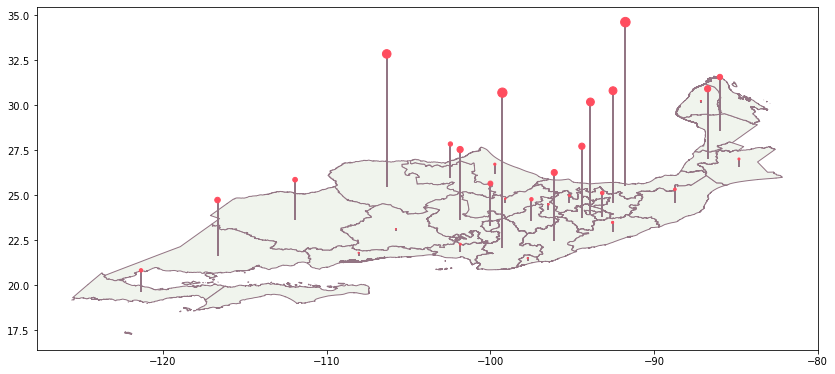

In [162]:
!git clone https://github.com/jschleuss/mexican-states.git

mex=gpd.read_file("mexican-states/mexican-states.shp")
df_dummy = pd.DataFrame({'Estados':mex.name.values,
                         'índice':B*100})
#Asignando centroides
x0=-102.57634952
y0=23.9353719
mex_tr = (mex["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))

x=(mex_tr
   .centroid
   .apply(lambda p:p.x)
   .values)
y=(mex_tr
   .centroid
   .apply(lambda p:p.y)
   .values)

fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
mex_tr.plot(ax=ax,
            color="#F0F4ED",
            edgecolor="#937584",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+df_dummy['índice'].values,
           color="#ff4d5f",
           zorder=2,
           s=10*df_dummy['índice'].values)
for i in range(32):
   ax.plot([x,x],
           [y,y+df_dummy['índice'].values],
           color="#937584",
           zorder=1)
plt.show()

#ANÁLISIS DE LA RED DE COMERCIALIZACIÓN DE FRUTAS Y HORTALIZAS, 2020

DataFrame 2020

In [163]:
#DATAFRAME COMERCIO 2020

c2020.columns = c2020.columns.str.lower()
#Quedarse solo con los estados en la columna destino
c2020['destino']=c2020['destino'].apply(lambda x:(re.search('(.+(?=:))', x)).group(1))
#Agrupando
adj_2020 = c2020.groupby(['origen', 'destino']).size().rename('peso').reset_index()
#Eliminamos self-loops
adj_2020=adj_2020[adj_2020['origen']!=adj_2020['destino']]
adj_2020.head()

,origen,destino,peso
1,Aguascalientes,Chihuahua,12
2,Aguascalientes,Coahuila,6
3,Aguascalientes,Durango,25
4,Aguascalientes,Guanajuato,6
5,Aguascalientes,Michoacán,12


Red 2020

In [164]:
#RED 2020

G20 = nx.from_pandas_edgelist(
    adj_2020,
    source='origen',
    target='destino',
    edge_attr='peso',
    create_using=nx.DiGraph)

In [165]:
print("número de aristas", G20.size())
print("número de nodos", G20.order())

número de aristas 352
número de nodos 33


In-degree

In [166]:
#in-degree
id=dict(G20.in_degree())
id=pd.DataFrame([[key, id[key]] for key in id.keys()], columns=['estado', 'in-degree'])
id.sort_values(by='in-degree', ascending=False)

,estado,in-degree
12,Nuevo León,22
11,México,21
3,Durango,21
2,Coahuila,18
19,Distrito Federal,18
0,Aguascalientes,17
16,Querétaro,17
6,Puebla,16
5,Michoacán,15
14,Sonora,15


Out degree

In [167]:
#out-degree
od=dict(G20.out_degree())
od=pd.DataFrame([[key, od[key]] for key in od.keys()], columns=['estado', 'out-degree'])
od.sort_values(by='out-degree', ascending=False)

,estado,out-degree
24,Veracruz,22
6,Puebla,21
29,Importación,21
5,Michoacán,20
30,Sinaloa,19
8,Zacatecas,19
26,Tabasco,16
18,Chiapas,16
25,Colima,15
1,Chihuahua,14


Betweenness Centrality

In [168]:
#betweenness centrality
bc=dict(nx.betweenness_centrality(G20))
bc=pd.DataFrame([[key, bc[key]] for key in bc.keys()], columns=['estado', 'betweenness centrality'])
bc.sort_values(by='betweenness centrality', ascending=False)

,estado,betweenness centrality
11,México,0.121218
19,Distrito Federal,0.099290
6,Puebla,0.084691
21,Jalisco,0.056869
2,Coahuila,0.054752
12,Nuevo León,0.052948
24,Veracruz,0.040419
8,Zacatecas,0.038547
9,Baja California,0.036250
5,Michoacán,0.031028


MAPAS: LOS NODOS MÁS IMPORTANTES EN 2020

In [169]:
idc=nx.in_degree_centrality(G20)
A=(idc['Aguascalientes'], idc['Colima'], 0, idc['Distrito Federal'] , idc['Morelos'], idc['México'], idc['Hidalgo'], idc['Puebla'], idc['Nuevo León'], idc['Coahuila'], idc['Chihuahua'], idc['Sonora'], idc['Michoacán'], idc['Querétaro'], idc['Guanajuato'], idc['Jalisco'], idc['Zacatecas'], idc['Durango'], idc['Tamaulipas'], idc['Veracruz'], idc['Guerrero'], idc['Sinaloa'], idc['Oaxaca'], idc['Nayarit'], idc['Chiapas'], idc['Tabasco'], idc['Campeche'], idc['Baja California'], idc['Baja California Sur'], idc['San Luis Potosí'], idc['Yucatán'], idc['Quintana Roo'])
B=np.array(A)
B

array([0.53125, 0.03125, 0.     , 0.5625 , 0.4375 , 0.65625, 0.4375 ,
       0.5    , 0.6875 , 0.5625 , 0.46875, 0.46875, 0.46875, 0.53125,
       0.40625, 0.46875, 0.3125 , 0.65625, 0.1875 , 0.40625, 0.125  ,
       0.0625 , 0.21875, 0.     , 0.125  , 0.21875, 0.125  , 0.4375 ,
       0.1875 , 0.40625, 0.28125, 0.03125])

fatal: destination path 'mexican-states' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



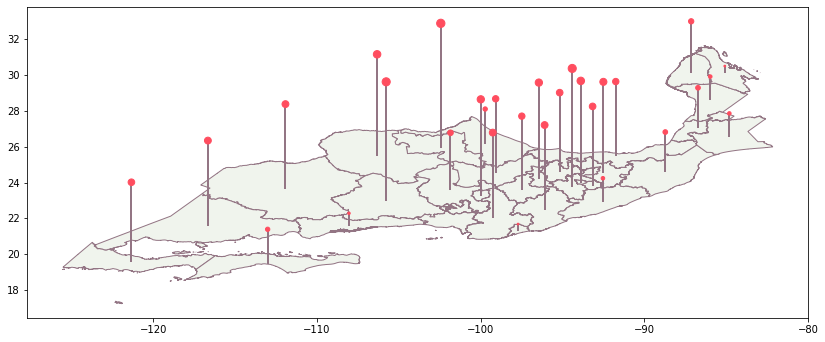

In [170]:
!git clone https://github.com/jschleuss/mexican-states.git

mex=gpd.read_file("mexican-states/mexican-states.shp")
df_dummy = pd.DataFrame({'Estados':mex.name.values,
                         'índice':B*10})
#Asignando centroides
x0=-102.57634952
y0=23.9353719
mex_tr = (mex["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))

x=(mex_tr
   .centroid
   .apply(lambda p:p.x)
   .values)
y=(mex_tr
   .centroid
   .apply(lambda p:p.y)
   .values)

fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
mex_tr.plot(ax=ax,
            color="#F0F4ED",
            edgecolor="#937584",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+df_dummy['índice'].values,
           color="#ff4d5f",
           zorder=2,
           s=10*df_dummy['índice'].values)
for i in range(32):
   ax.plot([x,x],
           [y,y+df_dummy['índice'].values],
           color="#937584",
           zorder=1)
plt.show()

In [171]:
odc=nx.out_degree_centrality(G20)
A=(odc['Aguascalientes'], odc['Colima'], 0, odc['Distrito Federal'] , odc['Morelos'], odc['México'], odc['Hidalgo'], odc['Puebla'], odc['Nuevo León'], odc['Coahuila'], odc['Chihuahua'], odc['Sonora'], odc['Michoacán'], odc['Querétaro'], odc['Guanajuato'], odc['Jalisco'], odc['Zacatecas'], odc['Durango'], odc['Tamaulipas'], odc['Veracruz'], odc['Guerrero'], odc['Sinaloa'], odc['Oaxaca'], odc['Nayarit'], odc['Chiapas'], odc['Tabasco'], odc['Campeche'], odc['Baja California'], odc['Baja California Sur'], odc['San Luis Potosí'], odc['Yucatán'], odc['Quintana Roo'])
B=np.array(A)
B

array([0.25   , 0.46875, 0.     , 0.40625, 0.3125 , 0.40625, 0.15625,
       0.65625, 0.1875 , 0.34375, 0.4375 , 0.3125 , 0.625  , 0.03125,
       0.40625, 0.40625, 0.59375, 0.03125, 0.1875 , 0.6875 , 0.4375 ,
       0.59375, 0.40625, 0.3125 , 0.5    , 0.5    , 0.09375, 0.1875 ,
       0.03125, 0.1875 , 0.0625 , 0.03125])

fatal: destination path 'mexican-states' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



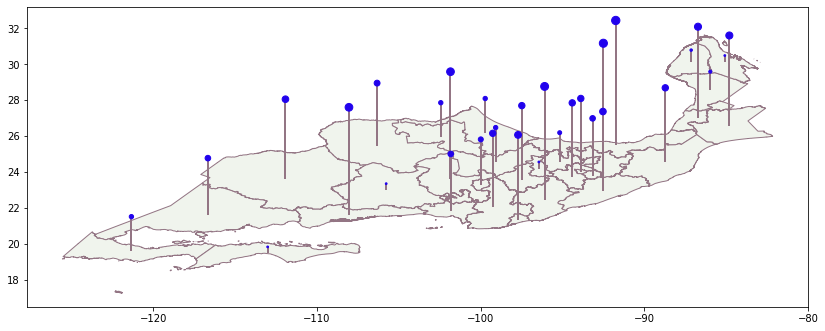

In [172]:
!git clone https://github.com/jschleuss/mexican-states.git

mex=gpd.read_file("mexican-states/mexican-states.shp")
df_dummy = pd.DataFrame({'Estados':mex.name.values,
                         'índice':B*10})
#Asignando centroides
x0=-102.57634952
y0=23.9353719
mex_tr = (mex["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))

x=(mex_tr
   .centroid
   .apply(lambda p:p.x)
   .values)
y=(mex_tr
   .centroid
   .apply(lambda p:p.y)
   .values)

fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
mex_tr.plot(ax=ax,
            color="#F0F4ED",
            edgecolor="#937584",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+df_dummy['índice'].values,
           color="#2102ED",
           zorder=2,
           s=10*df_dummy['índice'].values)
for i in range(32):
   ax.plot([x,x],
           [y,y+df_dummy['índice'].values],
           color="#937584",
           zorder=1)
plt.show()

In [173]:
bc=nx.betweenness_centrality(G20)
A=(bc['Aguascalientes'], bc['Colima'], 0, bc['Distrito Federal'] , bc['Morelos'], bc['México'], bc['Hidalgo'], bc['Puebla'], bc['Nuevo León'], bc['Coahuila'], bc['Chihuahua'], bc['Sonora'], bc['Michoacán'], bc['Querétaro'], bc['Guanajuato'], bc['Jalisco'], bc['Zacatecas'], bc['Durango'], bc['Tamaulipas'], bc['Veracruz'], bc['Guerrero'], bc['Sinaloa'], bc['Oaxaca'], bc['Nayarit'], bc['Chiapas'], bc['Tabasco'], bc['Campeche'], bc['Baja California'], bc['Baja California Sur'], bc['San Luis Potosí'], bc['Yucatán'], bc['Quintana Roo'])
B=np.array(A)
B

array([0.02028431, 0.00088249, 0.        , 0.09929017, 0.01416636,
       0.12121755, 0.00367464, 0.08469053, 0.05294788, 0.05475238,
       0.02337517, 0.02650813, 0.03102762, 0.00141247, 0.01633179,
       0.05686924, 0.0385473 , 0.00090726, 0.0025006 , 0.04041936,
       0.00217178, 0.00254784, 0.00443272, 0.        , 0.00295303,
       0.01699096, 0.00128808, 0.03624956, 0.00073925, 0.01039787,
       0.03081077, 0.        ])

fatal: destination path 'mexican-states' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



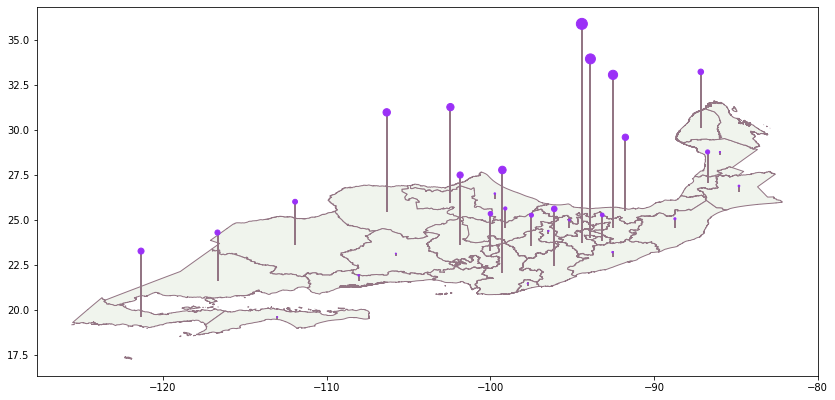

In [174]:
!git clone https://github.com/jschleuss/mexican-states.git

mex=gpd.read_file("mexican-states/mexican-states.shp")
df_dummy = pd.DataFrame({'Estados':mex.name.values,
                         'índice':B*100})
#Asignando centroides
x0=-102.57634952
y0=23.9353719
mex_tr = (mex["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))

x=(mex_tr
   .centroid
   .apply(lambda p:p.x)
   .values)
y=(mex_tr
   .centroid
   .apply(lambda p:p.y)
   .values)

fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
mex_tr.plot(ax=ax,
            color="#F0F4ED",
            edgecolor="#937584",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+df_dummy['índice'].values,
           color="#9B30F7",
           zorder=2,
           s=10*df_dummy['índice'].values)
for i in range(32):
   ax.plot([x,x],
           [y,y+df_dummy['índice'].values],
           color="#937584",
           zorder=1)
plt.show()

#ANÁLISIS DE LA RED DE COMERCIALIZACIÓN DE FRUTAS Y HORTALIZAS, 2021

DataFrame 2021

In [175]:
#DATAFRAME COMERCIO 2021

c2021.columns = c2021.columns.str.lower()
#Quedarse solo con los estados en la columna destino
c2021['destino']=c2021['destino'].apply(lambda x:(re.search('(.+(?=:))', x)).group(1))
#Agrupando
adj_2021 = c2021.groupby(['origen', 'destino']).size().rename('peso').reset_index()
#Eliminamos self-loops
adj_2021=adj_2021[adj_2021['origen']!=adj_2021['destino']]
adj_2021.head()

,origen,destino,peso
1,Aguascalientes,Chihuahua,6
2,Aguascalientes,Coahuila,6
3,Aguascalientes,Durango,6
4,Aguascalientes,Michoacán,18
5,Aguascalientes,San Luis Potosí,6


Red 2021

In [176]:
#RED 2021

G21 = nx.from_pandas_edgelist(
    adj_2021,
    source='origen',
    target='destino',
    edge_attr='peso',
    create_using=nx.DiGraph)

In degree

In [177]:
#in-degree
id=dict(G21.in_degree())
id=pd.DataFrame([[key, id[key]] for key in id.keys()], columns=['estado', 'in-degree'])
id.sort_values(by='in-degree', ascending=False)

,estado,in-degree
12,México,20
13,Nuevo León,20
2,Coahuila,18
0,Aguascalientes,17
24,Querétaro,17
14,Sonora,17
16,Morelos,17
3,Durango,17
1,Chihuahua,15
22,Puebla,15


Out degree

In [178]:
#out-degree
od=dict(G21.out_degree())
od=pd.DataFrame([[key, od[key]] for key in od.keys()], columns=['estado', 'out-degree'])
od.sort_values(by='out-degree', ascending=False)

,estado,out-degree
28,Importación,22
4,Michoacán,20
7,Veracruz,20
22,Puebla,19
29,Sinaloa,19
8,Zacatecas,18
25,Tabasco,16
26,Colima,15
23,Guanajuato,15
18,Chiapas,15


Betweenness Centrality

In [179]:
#betweenness centrality
bc=dict(nx.betweenness_centrality(G21))
bc=pd.DataFrame([[key, bc[key]] for key in bc.keys()], columns=['estado', 'betweenness centrality'])
bc.sort_values(by='betweenness centrality', ascending=False)

,estado,betweenness centrality
12,México,0.096700
11,Jalisco,0.082661
22,Puebla,0.074456
2,Coahuila,0.054490
15,Campeche,0.054435
7,Veracruz,0.053707
19,Distrito Federal,0.040372
9,Baja California,0.038994
4,Michoacán,0.037110
16,Morelos,0.032295


MAPAS: LOS NODOS MÁS IMPORTANTES EN 2021

In [180]:
idc=nx.in_degree_centrality(G21)
A=(idc['Aguascalientes'], idc['Colima'], 0, idc['Distrito Federal'] , idc['Morelos'], idc['México'], idc['Hidalgo'], idc['Puebla'], idc['Nuevo León'], idc['Coahuila'], idc['Chihuahua'], idc['Sonora'], idc['Michoacán'], idc['Querétaro'], idc['Guanajuato'], idc['Jalisco'], idc['Zacatecas'], idc['Durango'], idc['Tamaulipas'], idc['Veracruz'], idc['Guerrero'], idc['Sinaloa'], idc['Oaxaca'], idc['Nayarit'], idc['Chiapas'], idc['Tabasco'], idc['Campeche'], idc['Baja California'], idc['Baja California Sur'], idc['San Luis Potosí'], idc['Yucatán'], idc['Quintana Roo'])
B=np.array(A)
B

array([0.53125, 0.03125, 0.     , 0.46875, 0.53125, 0.625  , 0.40625,
       0.46875, 0.625  , 0.5625 , 0.46875, 0.53125, 0.46875, 0.53125,
       0.34375, 0.4375 , 0.3125 , 0.53125, 0.1875 , 0.4375 , 0.125  ,
       0.03125, 0.21875, 0.     , 0.125  , 0.21875, 0.125  , 0.375  ,
       0.15625, 0.46875, 0.3125 , 0.     ])

fatal: destination path 'mexican-states' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



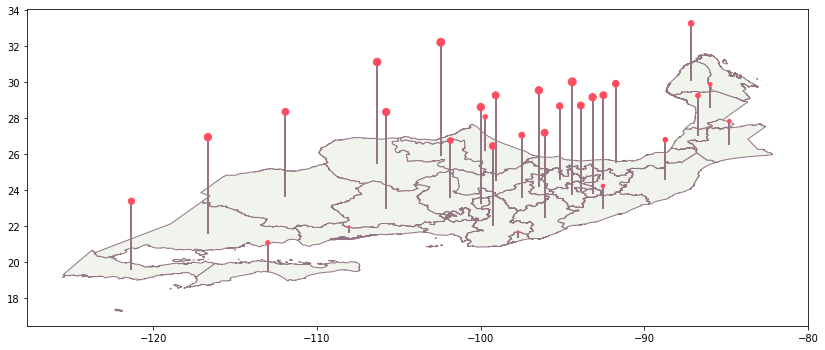

In [181]:
!git clone https://github.com/jschleuss/mexican-states.git

mex=gpd.read_file("mexican-states/mexican-states.shp")
df_dummy = pd.DataFrame({'Estados':mex.name.values,
                         'índice':B*10})
#Asignando centroides
x0=-102.57634952
y0=23.9353719
mex_tr = (mex["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))

x=(mex_tr
   .centroid
   .apply(lambda p:p.x)
   .values)
y=(mex_tr
   .centroid
   .apply(lambda p:p.y)
   .values)

fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
mex_tr.plot(ax=ax,
            color="#F0F4ED",
            edgecolor="#937584",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+df_dummy['índice'].values,
           color="#ff4d5f",
           zorder=2,
           s=10*df_dummy['índice'].values)
for i in range(32):
   ax.plot([x,x],
           [y,y+df_dummy['índice'].values],
           color="#937584",
           zorder=1)
plt.show()

In [182]:
odc=nx.out_degree_centrality(G21)
A=(odc['Aguascalientes'], odc['Colima'], 0, odc['Distrito Federal'] , odc['Morelos'], odc['México'], odc['Hidalgo'], odc['Puebla'], odc['Nuevo León'], odc['Coahuila'], odc['Chihuahua'], odc['Sonora'], odc['Michoacán'], odc['Querétaro'], odc['Guanajuato'], odc['Jalisco'], odc['Zacatecas'], odc['Durango'], odc['Tamaulipas'], odc['Veracruz'], odc['Guerrero'], odc['Sinaloa'], odc['Oaxaca'], odc['Nayarit'], odc['Chiapas'], odc['Tabasco'], odc['Campeche'], odc['Baja California'], odc['Baja California Sur'], odc['San Luis Potosí'], odc['Yucatán'], odc['Quintana Roo'])
B=np.array(A)
B

array([0.25   , 0.46875, 0.     , 0.375  , 0.25   , 0.4375 , 0.15625,
       0.59375, 0.15625, 0.34375, 0.4375 , 0.15625, 0.625  , 0.     ,
       0.46875, 0.40625, 0.5625 , 0.03125, 0.25   , 0.625  , 0.3125 ,
       0.59375, 0.4375 , 0.4375 , 0.46875, 0.5    , 0.09375, 0.1875 ,
       0.03125, 0.15625, 0.03125, 0.03125])

fatal: destination path 'mexican-states' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



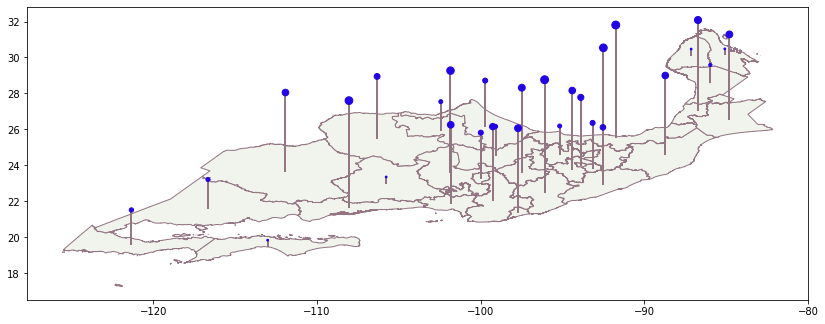

In [183]:
!git clone https://github.com/jschleuss/mexican-states.git

mex=gpd.read_file("mexican-states/mexican-states.shp")
df_dummy = pd.DataFrame({'Estados':mex.name.values,
                         'índice':B*10})
#Asignando centroides
x0=-102.57634952
y0=23.9353719
mex_tr = (mex["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))

x=(mex_tr
   .centroid
   .apply(lambda p:p.x)
   .values)
y=(mex_tr
   .centroid
   .apply(lambda p:p.y)
   .values)

fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
mex_tr.plot(ax=ax,
            color="#F0F4ED",
            edgecolor="#937584",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+df_dummy['índice'].values,
           color="#2102ED",
           zorder=2,
           s=10*df_dummy['índice'].values)
for i in range(32):
   ax.plot([x,x],
           [y,y+df_dummy['índice'].values],
           color="#937584",
           zorder=1)
plt.show()

In [184]:
bc=nx.betweenness_centrality(G21)
A=(bc['Aguascalientes'], bc['Colima'], 0, bc['Distrito Federal'] , bc['Morelos'], bc['México'], bc['Hidalgo'], bc['Puebla'], bc['Nuevo León'], bc['Coahuila'], bc['Chihuahua'], bc['Sonora'], bc['Michoacán'], bc['Querétaro'], bc['Guanajuato'], bc['Jalisco'], bc['Zacatecas'], bc['Durango'], bc['Tamaulipas'], bc['Veracruz'], bc['Guerrero'], bc['Sinaloa'], bc['Oaxaca'], bc['Nayarit'], bc['Chiapas'], bc['Tabasco'], bc['Campeche'], bc['Baja California'], bc['Baja California Sur'], bc['San Luis Potosí'], bc['Yucatán'], bc['Quintana Roo'])
B=np.array(A)
B

array([0.02203524, 0.00090806, 0.        , 0.04037175, 0.03229548,
       0.09670001, 0.00432148, 0.07445611, 0.02171675, 0.05449021,
       0.0298366 , 0.00844894, 0.03710961, 0.        , 0.01594562,
       0.08266065, 0.02891069, 0.        , 0.00593198, 0.05370702,
       0.00130608, 0.00111967, 0.00826501, 0.        , 0.00311491,
       0.01393426, 0.05443548, 0.03899429, 0.00056704, 0.0101602 ,
       0.03043429, 0.        ])

fatal: destination path 'mexican-states' already exists and is not an empty directory.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



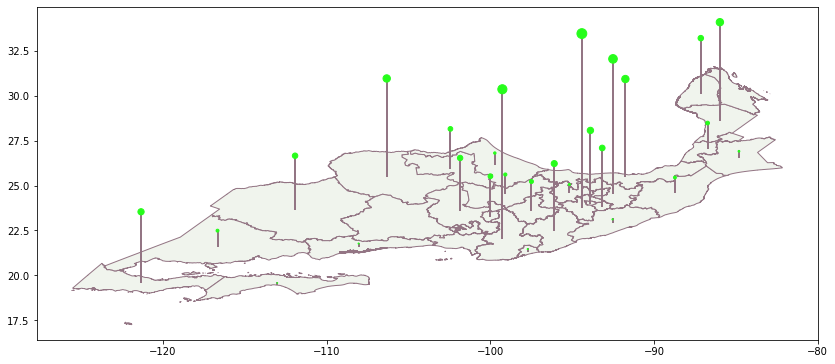

In [185]:
!git clone https://github.com/jschleuss/mexican-states.git

mex=gpd.read_file("mexican-states/mexican-states.shp")
df_dummy = pd.DataFrame({'Estados':mex.name.values,
                         'índice':B*100})
#Asignando centroides
x0=-102.57634952
y0=23.9353719
mex_tr = (mex["geometry"]
           .skew(xs=-40,ys=0,use_radians=False,origin=(x0,y0))
           .rotate(angle=33,use_radians=False,origin=(x0,y0)))

x=(mex_tr
   .centroid
   .apply(lambda p:p.x)
   .values)
y=(mex_tr
   .centroid
   .apply(lambda p:p.y)
   .values)

fig,ax = plt.subplots(1,1,figsize=(14,14))
#Graficando el mapa
mex_tr.plot(ax=ax,
            color="#F0F4ED",
            edgecolor="#937584",
            zorder=1)
#Mostrando la posición de las coordenadas
ax.scatter(x=x,
           y=y+df_dummy['índice'].values,
           color="#26FD1B",
           zorder=2,
           s=10*df_dummy['índice'].values)
for i in range(32):
   ax.plot([x,x],
           [y,y+df_dummy['índice'].values],
           color="#937584",
           zorder=1)
plt.show()

#RED DE TRANSPORTE

Data Frame, transporte

In [186]:
#Promediamos los costos, distancia, tiempo, etc, para cada estado:
dist=dist.groupby(['edo_origen', 'edo_destino'])[['distancia(km)', 'cost_combustible(MXN)', 'cost_casetas(MXN)', 'cost_total(MXN)', 'tiempo(hrs)']].mean().reset_index()
dist=dist.explode('edo_destino')
#Eliminando caracteres extraños
dist['edo_destino']=dist['edo_destino'].str.replace('Ã©','é').str.replace('Ã¡','á').str.replace('Ã³','ó').str.replace('Ã­','í')
dist['edo_origen']=dist['edo_origen'].str.replace('Ã©','é').str.replace('Ã¡','á').str.replace('Ã³','ó').str.replace('Ã­','í')
#Renombarndo columnas
dist=dist.rename(columns={'edo_destino':'destino', 'edo_origen':'origen', 'distancia(km)':'distancia', 'cost_combustible(MXN)':'cost_combustible', 'cost_casetas(MXN)':'cost_casetas', 'cost_total(MXN)':'cost_total', 'tiempo(hrs)':'tiempo'})
dist.head()

,origen,destino,distancia,cost_combustible,cost_casetas,cost_total,tiempo
0,Aguascalientes,Baja California,2279.52,4027.2,2560.0,6587.2,22.566667
1,Aguascalientes,Baja California Sur,3910.49,6908.5,2929.0,9837.5,42.983333
2,Aguascalientes,Campeche,1625.44,2871.6,2200.0,5071.6,16.300000
3,Aguascalientes,Chiapas,1332.60,2354.3,2120.0,4474.3,12.416667
4,Aguascalientes,Chihuahua,959.14,1694.5,920.0,2614.5,9.833333


In [187]:
#De los deatod de comercialización eliminamos los orígenes: 'importación' y 'nacional', pues de ello no tenemos costos de transporte
adj_2019_1=adj_2019.drop(range(130,153), axis=0)
adj_2019_1=adj_2019_1.drop([213,214], axis=0)
adj_2020_1=adj_2020.drop(range(133,154), axis=0)
adj_2020_1=adj_2020_1.drop([214, 215, 216], axis=0)
adj_2021_1=adj_2021.drop(range(129,151), axis=0)
adj_2021_1=adj_2021_1.drop([210,211, 212], axis=0)

In [188]:
#Uniendo las bases de datos
ADJ_2019=pd.merge(adj_2019_1, dist, how='left',on=('origen','destino'))
ADJ_2020=pd.merge(adj_2020_1, dist, how='left',on=('origen','destino'))
ADJ_2021=pd.merge(adj_2021_1, dist, how='left',on=('origen','destino'))

##**Ánalisis de los costos de transporte y tiempo, 2019**

---



Costos de transporte

In [189]:
#RED AUMENTADA 2019
G19_1 = nx.from_pandas_edgelist(
    ADJ_2019,
    source='origen',
    target='destino',
    edge_attr='cost_total',
    create_using=nx.DiGraph)

In [190]:
#Ruta más barata
ADJ_2019['ruta más barata']=None
ADJ_2019['costo de la ruta más barata']=None

for indice, fila in ADJ_2019.iterrows():
  ADJ_2019['ruta más barata'].iloc[indice]=nx.bellman_ford_path(G19_1,fila['origen'],fila['destino'],weight='cost_total')
  ADJ_2019['costo de la ruta más barata'].iloc[indice]=nx.bellman_ford_path_length(G19_1,fila['origen'],fila['destino'],weight='cost_total')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Minimización de tiempo

In [191]:
#RED AUMENTADA 2019
G19_2 = nx.from_pandas_edgelist(
    ADJ_2019,
    source='origen',
    target='destino',
    edge_attr='tiempo',
    create_using=nx.DiGraph)

In [192]:
#Ruta más rápida
ADJ_2019['ruta más rápida']=None
ADJ_2019['tiempo de la ruta más rápida']=None

for indice, fila in ADJ_2019.iterrows():
  ADJ_2019['ruta más rápida'].iloc[indice]=nx.bellman_ford_path(G19_2,fila['origen'],fila['destino'],weight='tiempo')
  ADJ_2019['tiempo de la ruta más rápida'].iloc[indice]=nx.bellman_ford_path_length(G19_2,fila['origen'],fila['destino'],weight='tiempo')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [193]:
#Resumen 2019
Trns_2019=ADJ_2019.drop(['frecuencia', 'distancia','cost_combustible', 'cost_casetas','cost_total', 'tiempo', 'ruta más barata', 'costo de la ruta más barata', 'ruta más rápida','tiempo de la ruta más rápida' ], axis=1)
Trns_2019["minimización de costo"] = np.where(ADJ_2019["cost_total"] == ADJ_2019["costo de la ruta más barata"], 'Óptimo', 'No óptimo')
Trns_2019["minimización de tiempo"] = np.where(ADJ_2019["tiempo"] == ADJ_2019["tiempo de la ruta más rápida"], 'Óptimo', 'No óptimo')
Trns_2019

,origen,destino,minimización de costo,minimización de tiempo
0,Aguascalientes,Chihuahua,Óptimo,No óptimo
1,Aguascalientes,Durango,Óptimo,No óptimo
2,Aguascalientes,Michoacán,Óptimo,Óptimo
3,Aguascalientes,Nayarit,Óptimo,Óptimo
4,Aguascalientes,Tamaulipas,Óptimo,Óptimo
...,...,...,...,...
325,Zacatecas,Puebla,Óptimo,Óptimo
326,Zacatecas,Querétaro,Óptimo,Óptimo
327,Zacatecas,San Luis Potosí,Óptimo,Óptimo
328,Zacatecas,Sonora,Óptimo,Óptimo


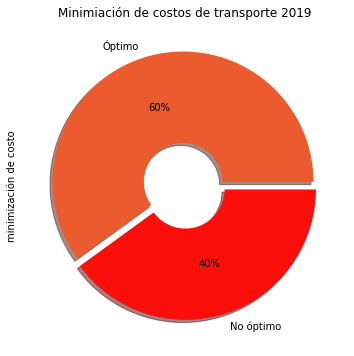

In [194]:
#Grafico de dona: transporte 2019
plot = Trns_2019['minimización de costo'].value_counts().plot(kind='pie', autopct='%1.f%%',  
                                                              colors=['#EC5B2E','#FC0E0B'],
                                                              figsize=(6, 6),
                                                              explode=[0.03,0.03],
                                                              shadow=True,
                                                              wedgeprops=dict(width=0.7),
                                                              title='Minimiación de costos de transporte 2019')

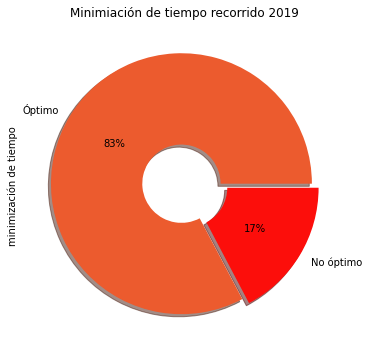

In [195]:
#Grafico de dona: tiempo2019
plot = Trns_2019['minimización de tiempo'].value_counts().plot(kind='pie', autopct='%1.f%%',  
                                                              colors=['#EC5B2E','#FC0E0B'],
                                                              figsize=(6, 6),
                                                              explode=[0.03,0.03],
                                                              shadow=True,
                                                              wedgeprops=dict(width=0.7),
                                                              title='Minimiación de tiempo recorrido 2019')

##**Ánalisis de los costos de transporte y tiempo, 2020**


In [196]:
#RED AUMENTADA 2020
G20_1 = nx.from_pandas_edgelist(
    ADJ_2020,
    source='origen',
    target='destino',
    edge_attr='cost_total',
    create_using=nx.DiGraph)

In [197]:
#Ruta más barata
ADJ_2020['ruta más barata']=None
ADJ_2020['costo de la ruta más barata']=None

for indice, fila in ADJ_2020.iterrows():
  ADJ_2020['ruta más barata'].iloc[indice]=nx.bellman_ford_path(G20_1,fila['origen'],fila['destino'],weight='cost_total')
  ADJ_2020['costo de la ruta más barata'].iloc[indice]=nx.bellman_ford_path_length(G20_1,fila['origen'],fila['destino'],weight='cost_total')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Minimización tiempo

In [198]:
#RED AUMENTADA 2020
G20_2 = nx.from_pandas_edgelist(
    ADJ_2020,
    source='origen',
    target='destino',
    edge_attr='tiempo',
    create_using=nx.DiGraph)

In [199]:
#Ruta más rápida
ADJ_2020['ruta más rápida']=None
ADJ_2020['tiempo de la ruta más rápida']=None

for indice, fila in ADJ_2020.iterrows():
  ADJ_2020['ruta más rápida'].iloc[indice]=nx.bellman_ford_path(G20_2,fila['origen'],fila['destino'],weight='tiempo')
  ADJ_2020['tiempo de la ruta más rápida'].iloc[indice]=nx.bellman_ford_path_length(G20_2,fila['origen'],fila['destino'],weight='tiempo')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [200]:
#Resumen 2020
Trns_2020=ADJ_2020.drop(['distancia','cost_combustible', 'cost_casetas','cost_total', 'tiempo', 'ruta más barata', 'costo de la ruta más barata', 'ruta más rápida','tiempo de la ruta más rápida' ], axis=1)
Trns_2020["minimización de costo"] = np.where(ADJ_2020["cost_total"] == ADJ_2020["costo de la ruta más barata"], 'Óptimo', 'No óptimo')
Trns_2020["minimización de tiempo"] = np.where(ADJ_2020["tiempo"] == ADJ_2020["tiempo de la ruta más rápida"], 'Óptimo', 'No óptimo')
Trns_2020

,origen,destino,peso,minimización de costo,minimización de tiempo
0,Aguascalientes,Chihuahua,12,Óptimo,No óptimo
1,Aguascalientes,Coahuila,6,Óptimo,No óptimo
2,Aguascalientes,Durango,25,Óptimo,No óptimo
3,Aguascalientes,Guanajuato,6,Óptimo,Óptimo
4,Aguascalientes,Michoacán,12,Óptimo,Óptimo
...,...,...,...,...,...
323,Zacatecas,Puebla,18,No óptimo,Óptimo
324,Zacatecas,Querétaro,30,No óptimo,Óptimo
325,Zacatecas,San Luis Potosí,30,Óptimo,Óptimo
326,Zacatecas,Sonora,16,Óptimo,Óptimo


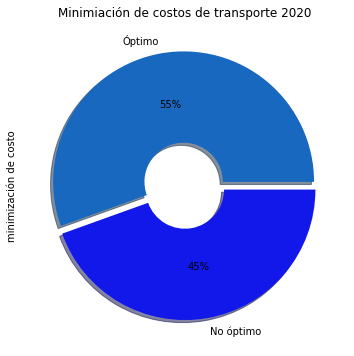

In [201]:
#Grafico de dona: transporte 2020
plot = Trns_2020['minimización de costo'].value_counts().plot(kind='pie', autopct='%1.f%%',  
                                                              colors=['#1868C0','#1318EA'],
                                                              figsize=(6, 6),
                                                              explode=[0.03,0.03],
                                                              shadow=True,
                                                              wedgeprops=dict(width=0.7),
                                                              title='Minimiación de costos de transporte 2020')

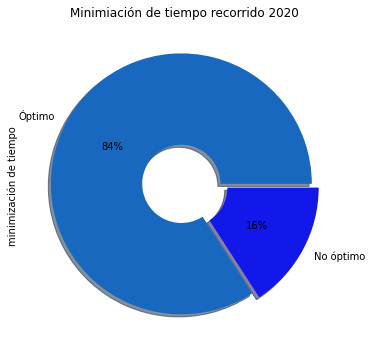

In [202]:
#Grafico de dona: tiempo 2020
plot = Trns_2020['minimización de tiempo'].value_counts().plot(kind='pie', autopct='%1.f%%',  
                                                              colors=['#1868C0','#1318EA'],
                                                              figsize=(6, 6),
                                                              explode=[0.03,0.03],
                                                              shadow=True,
                                                              wedgeprops=dict(width=0.7),
                                                              title='Minimiación de tiempo recorrido 2020')

##**Ánalisis de los costos de transporte y tiempo, 2021**


In [203]:
#RED AUMENTADA 2020
G21_1 = nx.from_pandas_edgelist(
    ADJ_2021,
    source='origen',
    target='destino',
    edge_attr='cost_total',
    create_using=nx.DiGraph)

In [204]:
#Ruta más barata
ADJ_2021['ruta más barata']=None
ADJ_2021['costo de la ruta más barata']=None

for indice, fila in ADJ_2021.iterrows():
  ADJ_2021['ruta más barata'].iloc[indice]=nx.bellman_ford_path(G21_1,fila['origen'],fila['destino'],weight='cost_total')
  ADJ_2021['costo de la ruta más barata'].iloc[indice]=nx.bellman_ford_path_length(G21_1,fila['origen'],fila['destino'],weight='cost_total')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Minimización tiempo

In [205]:
#RED AUMENTADA 2020
G21_2 = nx.from_pandas_edgelist(
    ADJ_2021,
    source='origen',
    target='destino',
    edge_attr='tiempo',
    create_using=nx.DiGraph)

In [206]:
#Ruta más rápida
ADJ_2021['ruta más rápida']=None
ADJ_2021['tiempo de la ruta más rápida']=None

for indice, fila in ADJ_2021.iterrows():
  ADJ_2021['ruta más rápida'].iloc[indice]=nx.bellman_ford_path(G21_2,fila['origen'],fila['destino'],weight='tiempo')
  ADJ_2021['tiempo de la ruta más rápida'].iloc[indice]=nx.bellman_ford_path_length(G21_2,fila['origen'],fila['destino'],weight='tiempo')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [207]:
#Resumen 2020
Trns_2021=ADJ_2021.drop(['distancia','cost_combustible', 'cost_casetas','cost_total', 'tiempo', 'ruta más barata', 'costo de la ruta más barata', 'ruta más rápida','tiempo de la ruta más rápida' ], axis=1)
Trns_2021["minimización de costo"] = np.where(ADJ_2021["cost_total"] == ADJ_2021["costo de la ruta más barata"], 'Óptimo', 'No óptimo')
Trns_2021["minimización de tiempo"] = np.where(ADJ_2021["tiempo"] == ADJ_2021["tiempo de la ruta más rápida"], 'Óptimo', 'No óptimo')
Trns_2021

,origen,destino,peso,minimización de costo,minimización de tiempo
0,Aguascalientes,Chihuahua,6,Óptimo,No óptimo
1,Aguascalientes,Coahuila,6,Óptimo,No óptimo
2,Aguascalientes,Durango,6,Óptimo,No óptimo
3,Aguascalientes,Michoacán,18,Óptimo,Óptimo
4,Aguascalientes,San Luis Potosí,6,Óptimo,Óptimo
...,...,...,...,...,...
311,Zacatecas,Puebla,18,No óptimo,Óptimo
312,Zacatecas,Querétaro,30,Óptimo,Óptimo
313,Zacatecas,San Luis Potosí,36,Óptimo,Óptimo
314,Zacatecas,Sonora,18,Óptimo,Óptimo


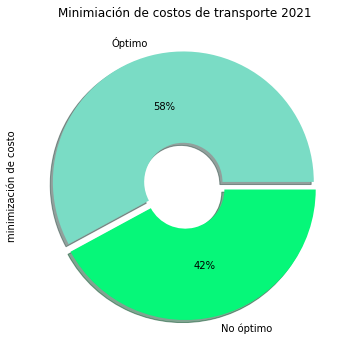

In [208]:
#Grafico de dona: transporte 2020
plot = Trns_2021['minimización de costo'].value_counts().plot(kind='pie', autopct='%1.f%%',  
                                                              colors=['#7ADCC5','#06F779'],
                                                              figsize=(6, 6),
                                                              explode=[0.03,0.03],
                                                              shadow=True,
                                                              wedgeprops=dict(width=0.7),
                                                              title='Minimiación de costos de transporte 2021')

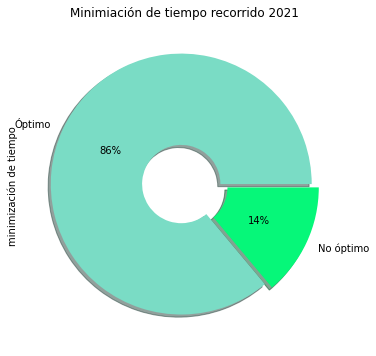

In [209]:
#Grafico de dona: tiempo 2020
plot = Trns_2021['minimización de tiempo'].value_counts().plot(kind='pie', autopct='%1.f%%',  
                                                              colors=['#7ADCC5','#06F779'],
                                                              figsize=(6, 6),
                                                              explode=[0.03,0.03],
                                                              shadow=True,
                                                              wedgeprops=dict(width=0.7),
                                                              title='Minimiación de tiempo recorrido 2021')

##Enlaces

*MAPA: https://medium.com/@gamoles/crea-un-mapa-en-proyeccion-2-5d-796ffd068e0d
*COLORES: https://www.htmlcsscolor.com/random-colors